In [51]:
import cv2 
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
import re
from pdf2image import convert_from_path
import argparse 
from skimage import io
from skimage.transform import rotate
from skimage.color import rgb2gray
from deskew import determine_skew

# Align text images

In [52]:
def deskew(_img):
    image = io.imread(_img)
    grayscale = rgb2gray(image)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, resize=True) * 255
    return rotated.astype(np.uint8)

In [53]:
def display_avant_apres(_original):
    plt.figure(figsize = (50,20))
    plt.subplot(1, 2, 1)
    plt.imshow(io.imread(_original))
    plt.subplot(1, 2, 2)
    plt.imshow(deskew(_original))

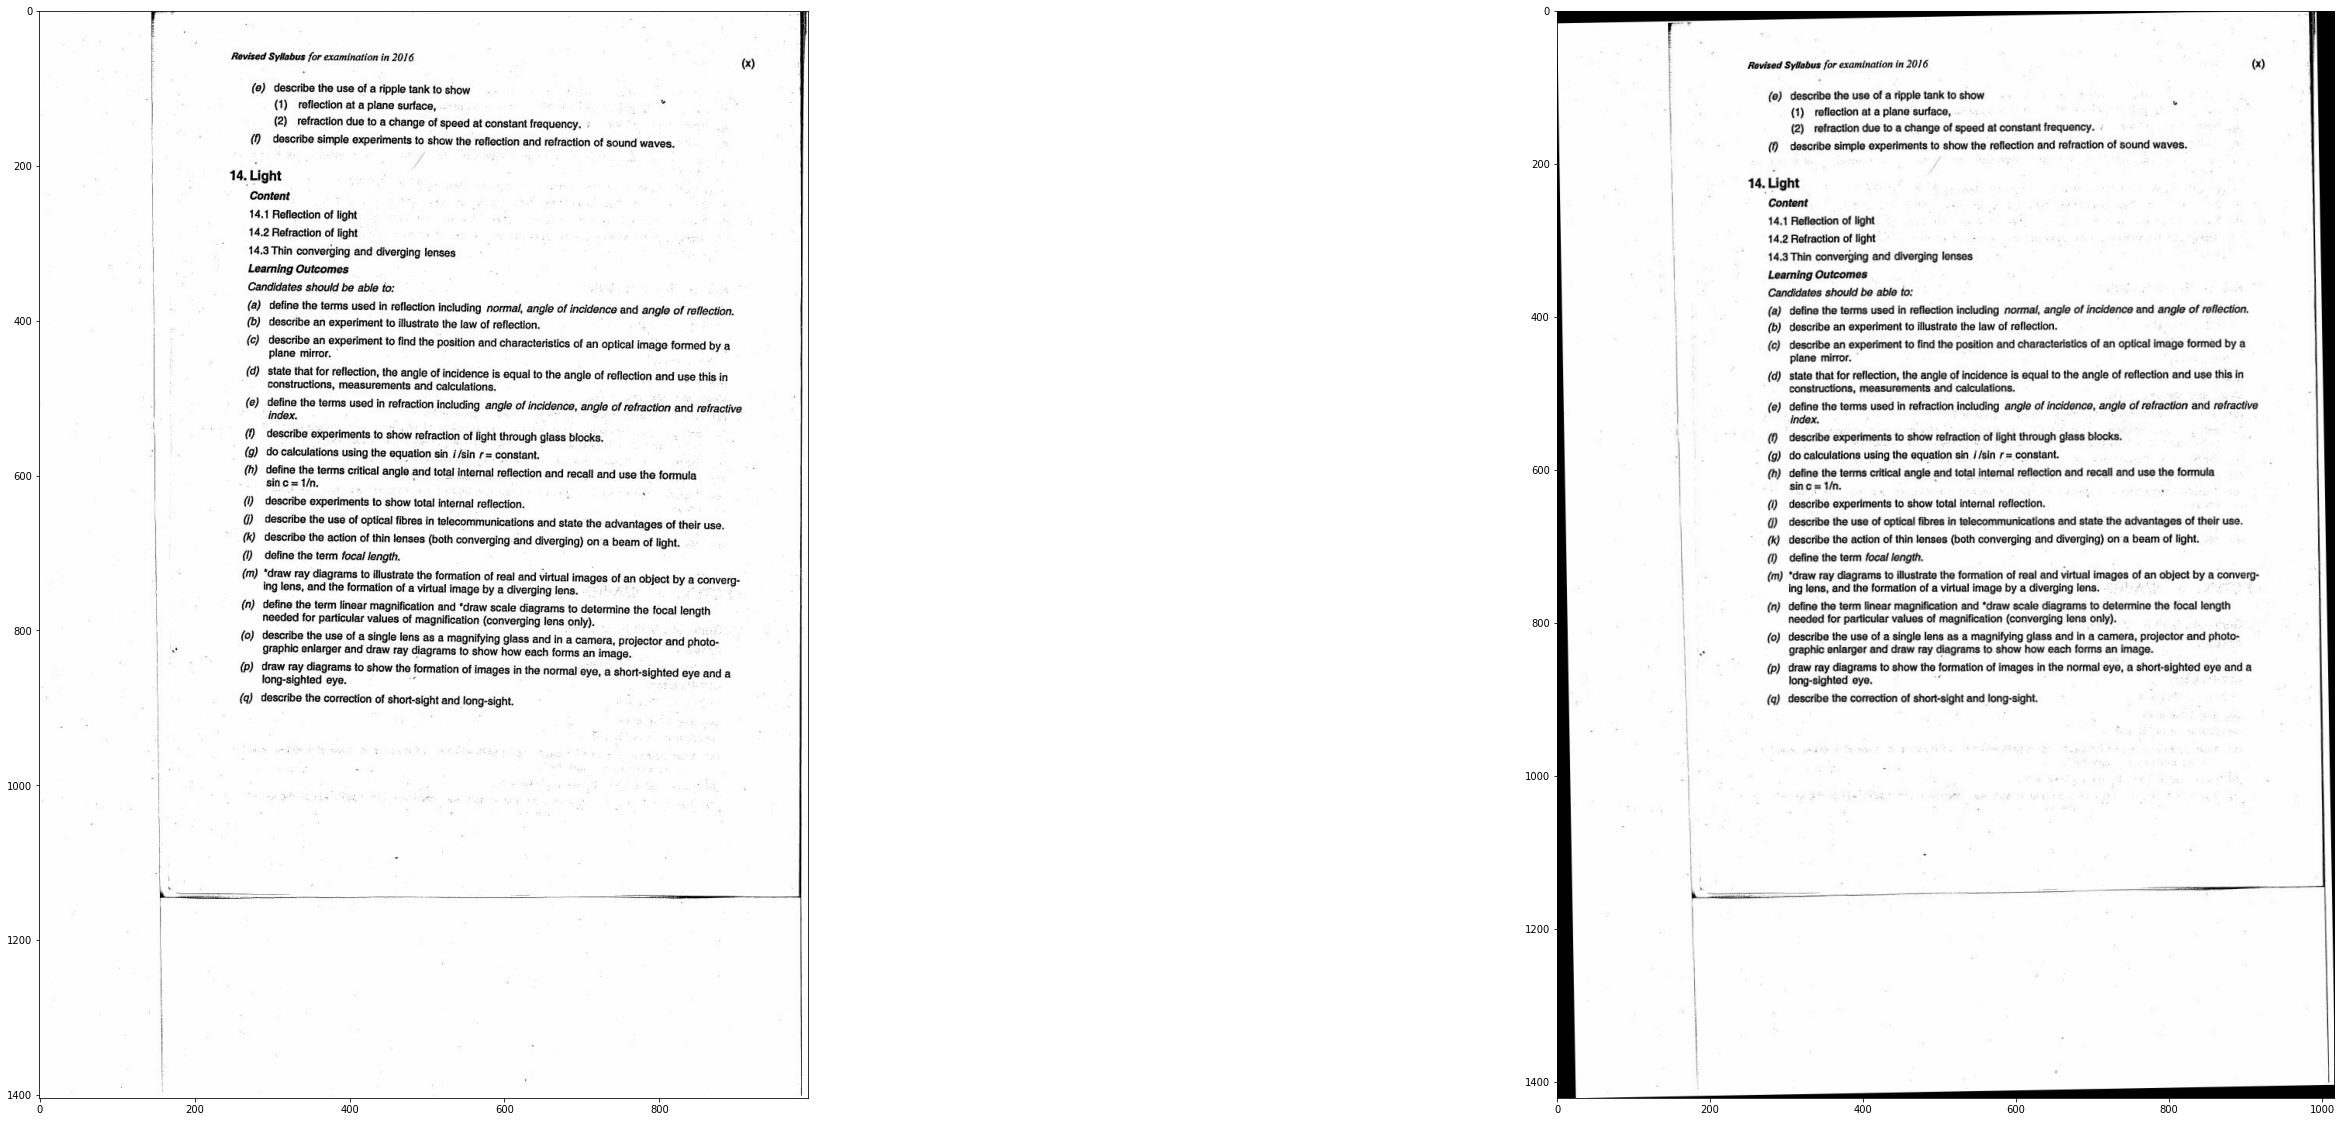

In [54]:
display_avant_apres('images/page11.jpg')

In [58]:
image=deskew('images/page11.jpg')
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(image, config=custom_config)

'a a a\ni ‘Revised Syhtobus for examination in 2016 «\n(0) describe the use of a ripple tank to show .\n\\ (1) reflection at a plane surface,\n(2) refraction due to a change of speed at constant frequency.\n(describe simple experiments to show the reflection and refraction of sound waves.\n14. Light\n| Content\n14.1 Reflection of light\n14.2 Refraction of light\n14.3 Thin converging and diverging lonses\nLearning Outcomes\nCandidates should be able to:\n(a) define the terms used in reflection including normal, angle of incidence and angle of reflection.\n(b) describe an experiment to illustrate the law of reflection.\n(0) describe an experiment to find the position and characteristics of an optical image formed by a\nplane mirror.\n| (d) state that for reflection, the angle of incidence is equal to the angle of reflection and use this in\nconstructions, measurements and calculations.\n(o} dete tha tere used a refraction including angle of incidence, angle of refraction and refractive\n

# Detect Text and Crop